In [0]:
import tensorflow  as tf
from tensorflow import keras as kr
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data()


In [0]:
print(x_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train.shape

(60000, 10)

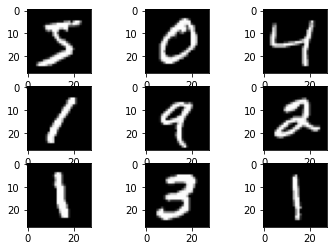

In [0]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X[i] , cmap = plt.get_cmap('gray'))

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
batch_size = 128
num_classes = 10
epochs = 10

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [0]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.3804 - accuracy: 0.8831 - val_loss: 0.0571 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1097 - accuracy: 0.9711 - val_loss: 0.0423 - val_accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0791 - accuracy: 0.9802 - val_loss: 0.0385 - val_accuracy: 0.9884
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0620 - accuracy: 0.9847 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0527 - accuracy: 0.9867 - val_loss: 0.0306 - val_accuracy: 0.9916
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0464 - accuracy: 0.9881 - val_loss: 0.0287 - val_accuracy: 0.9919
Epoch 7/10
60000/60000 [==============================] - 5s 91us/s

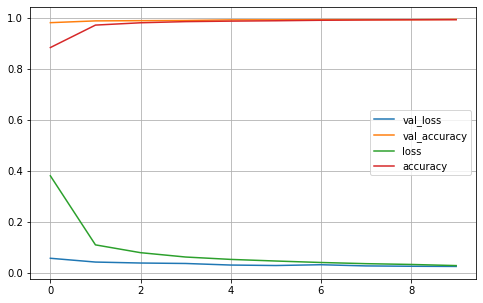

In [0]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [0]:
errors  , accuracy = model.evaluate(x_test , y_test)

10000/10000 [==============================] - 1s 108us/step


In [0]:
print(f'Our Model have {errors} errors and {accuracy*100}% accuracy')

Our Model have 0.025101778239685346 errors and 99.36000108718872% accuracy


In [0]:
model.save('Answer.h5')

In [0]:
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6])